In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn-poster')

sns.set_style('darkgrid')

import sqlite3

In [2]:
campaign = pd.read_csv("data/campaign_data.csv", parse_dates=['start_date', 'end_date'], dayfirst=True)
coupons = pd.read_csv("data/coupon_item_mapping.csv")
cust_demo = pd.read_csv("data/customer_demographics.csv")
cust_tran = pd.read_csv("data/customer_transaction_data.csv")
items = pd.read_csv("data/item_data.csv")
test = pd.read_csv("data/test_data.csv")
train = pd.read_csv("data/train_data.csv")

## Customer Information

In [3]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


### Data Cleaning

In [4]:
cust_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [5]:
for i in range(len(cust_demo.columns)):
    print(cust_demo.columns[i], '\n')
    print(cust_demo[cust_demo.columns[i]].unique(), '\n')

customer_id 

[   1    6    7    8   10   11   12   13   14   15   17   19   22   27
   28   30   31   33   35   36   38   39   40   41   42   45   48   51
   52   53   55   58   59   66   67   69   71   72   74   75   78   79
   82   83   84   85   87   89   90   92   93   94   97  103  105  107
  108  110  112  113  114  119  123  124  128  131  132  134  135  136
  138  140  141  142  143  144  149  150  151  153  154  155  158  159
  161  162  163  167  168  174  178  179  180  185  186  189  191  192
  193  195  197  201  202  204  205  207  209  212  214  223  225  226
  227  228  230  231  232  235  238  239  242  243  245  246  248  249
  250  251  252  253  259  262  265  266  267  268  269  271  276  277
  279  281  283  284  286  287  288  292  293  294  295  297  298  300
  303  306  313  314  315  316  317  318  319  320  327  329  333  336
  338  339  343  347  348  349  352  353  355  357  361  363  367  368
  369  371  374  375  377  378  381  382  383  384  386  389  3

In [6]:
cust_demo.marital_status.fillna('unknown', inplace = True)

In [7]:
cust_demo.no_of_children.fillna('0', inplace = True)

In [8]:
cust_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,unknown,0,3,1,3
3,8,26-35,unknown,0,4,2,6
4,10,46-55,Single,0,1,0,5


## Customer's Information (customer_demographics table)

In [9]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  760 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


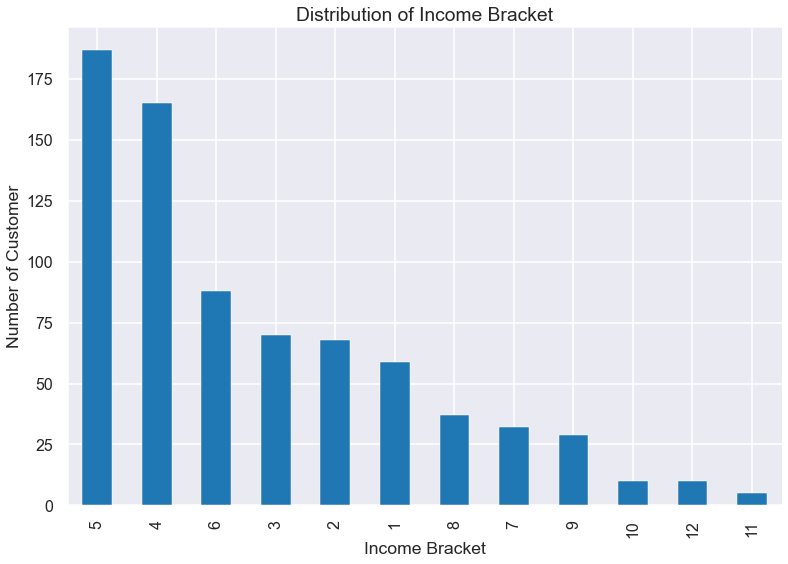

In [10]:
cust_demo["income_bracket"].value_counts().plot(kind='bar')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customer')
plt.title('Distribution of Income Bracket')
plt.show()

Most of the customers fall under 4 - 6 income bracket

In [11]:
cust_demo.marital_status.value_counts()

unknown    329
Married    317
Single     114
Name: marital_status, dtype: int64

In [12]:
cust_demo.age_range.value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [13]:
group_by_age = cust_demo.groupby(['age_range', 'income_bracket']).agg({'income_bracket' : 'count'})
group_by_age.columns = ['count']

In [14]:
group_by_age.head(10)

count
age_range income_bracket       
18-25     1                  10
          2                   4
          3                   4
          4                  13
          5                   9
          6                   2
          11                  1
          12                  2
26-35     1                   9
          2                  11

## Redemptions (train_data Table)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54858 entries, 0 to 54857
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 54858 non-null  int64
 1   campaign_id        54858 non-null  int64
 2   coupon_id          54858 non-null  int64
 3   customer_id        54858 non-null  int64
 4   redemption_status  54858 non-null  int64
dtypes: int64(5)
memory usage: 2.1 MB


In [16]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,117578,8,725,45,0
1,123337,29,265,334,0
2,46642,13,281,408,0
3,10510,13,625,577,0
4,14347,13,480,414,0


In [17]:
len(train.customer_id.unique())

1428

In [18]:
len(train.campaign_id.unique())

18

In [19]:
train["redemption_status"].value_counts()

0    54340
1      518
Name: redemption_status, dtype: int64

In [20]:
518/(54340+518)*100

0.9442560793320938

Only 0.94% of the coupon redemption is done.

In [21]:
group_by_redemption = train.groupby('redemption_status').agg({'coupon_id': 'nunique', 'customer_id': 'nunique', 'redemption_status': 'count'})
group_by_redemption.columns = ['coupons', 'customers', 'count']
group_by_redemption = group_by_redemption.reset_index()
group_by_redemption

,redemption_status,coupons,customers,count
0,0,866,1428,54340
1,1,202,213,518


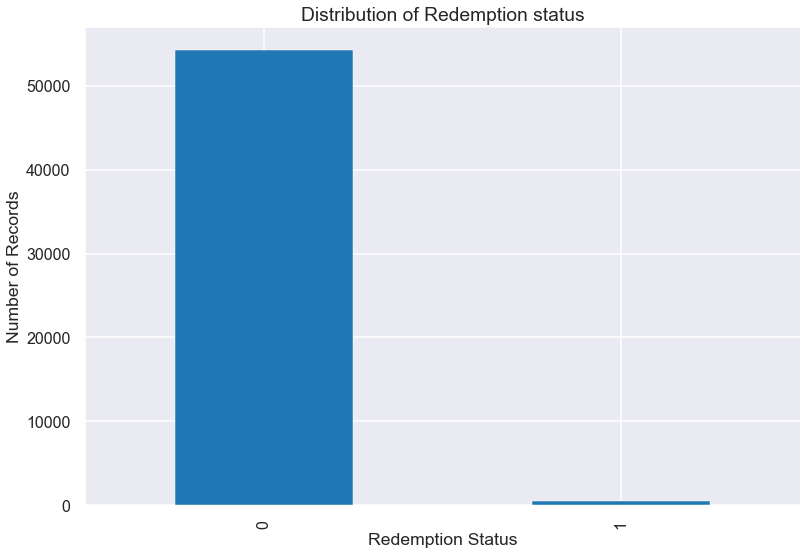

In [22]:
train["redemption_status"].value_counts().plot(kind='bar')
plt.xlabel('Redemption Status')
plt.ylabel('Number of Records')
plt.title('Distribution of Redemption status')
plt.show()

The dataset is highly imbalanced

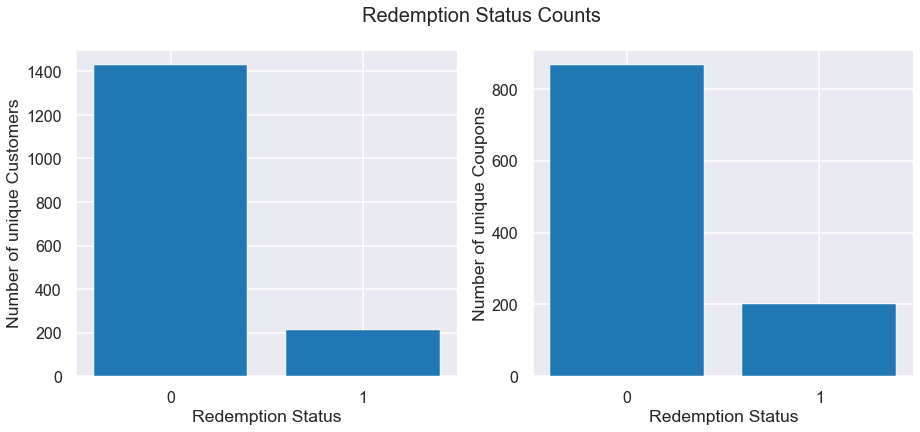

In [23]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

axes[0].bar(['0','1'],[1428, 213],align ='center')
axes[0].set_xlabel('Redemption Status')
axes[0].set_ylabel('Number of unique Customers')

axes[1].bar(['0','1'],[866, 202],align ='center')
axes[1].set_xlabel('Redemption Status')
axes[1].set_ylabel('Number of unique Coupons')


plt.suptitle('Redemption Status counts'.title(), fontsize = 20)
plt.show()

## Campaigns (campaign_data table)

In [24]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    28 non-null     int64         
 1   campaign_type  28 non-null     object        
 2   start_date     28 non-null     datetime64[ns]
 3   end_date       28 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.0+ KB


In [25]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22
2,20,Y,2013-09-07,2013-11-16
3,23,Y,2013-10-08,2013-11-15
4,21,Y,2013-09-16,2013-10-18


In [26]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [27]:
len(campaign.campaign_id.unique())

28

There are 28 Campaigns.

In [28]:
campaign['duration'] = (campaign['end_date'] - campaign['start_date']).dt.days
campaign = campaign.sort_values('start_date')
campaign.head()

,campaign_id,campaign_type,start_date,end_date,duration
27,26,X,2012-08-12,2012-09-21,40
26,27,Y,2012-08-25,2012-10-27,63
25,28,Y,2012-09-16,2012-11-16,61
24,29,Y,2012-10-08,2012-11-30,53
23,30,X,2012-11-19,2013-01-04,46


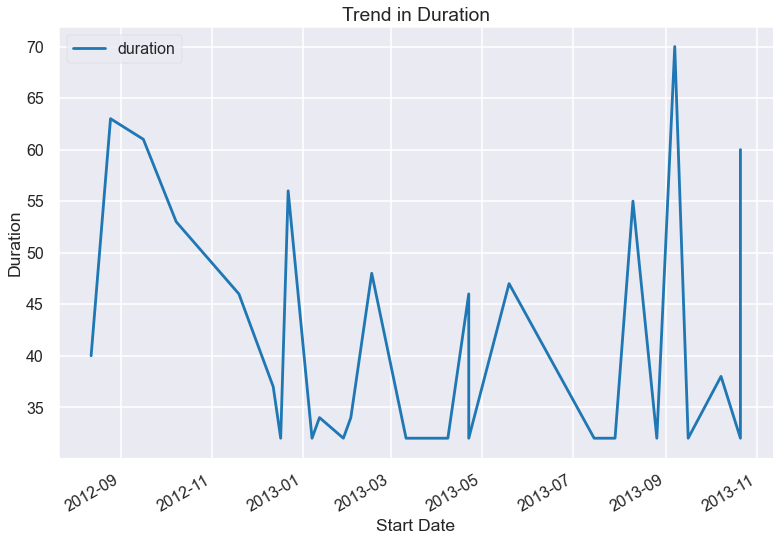

In [29]:
value = campaign.plot('start_date', 'duration')
plt.xlabel('Start Date')
plt.ylabel('Duration')
plt.title('Trend in Duration')
plt.show()

## Coupon item mapping (coupon_item_mapping table)

In [30]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [31]:
coupons.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [32]:
coupons.coupon_id.value_counts()

32      11814
23      11813
22       4947
31       4873
33       4394
        ...  
1054        1
943         1
762         1
480         1
760         1
Name: coupon_id, Length: 1116, dtype: int64

In [33]:
len(coupons.coupon_id.unique())

1116

In [34]:
len(coupons.item_id.unique())

36289

There are coupons that applied to multiple items like coupon id 32

## Customer Transaction Data (customer_transaction_data table)

In [35]:
cust_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [36]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [37]:
len(cust_tran.customer_id.unique())

1582

In [38]:
len(cust_tran[cust_tran.coupon_discount<0])/len(cust_tran.coupon_discount)*100

1.607016939888235

Only 1.6% of the transcations recevied the coupon discount.

In [39]:
cust_tran[cust_tran.coupon_discount<0].item_id.value_counts()

45502    187
45539    117
53521     74
53517     69
45578     61
        ... 
65927      1
37253      1
16767      1
37237      1
6141       1
Name: item_id, Length: 7349, dtype: int64

## Item Data (item_data table)

In [40]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [41]:
items.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [42]:
len(items.item_id.unique())

74066

In [43]:
items.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [44]:
items.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [45]:
transactions = items.merge(cust_tran[cust_tran.coupon_discount<0] , how='inner', on='item_id')
transactions.head()

,item_id,brand,brand_type,category,date,customer_id,quantity,selling_price,other_discount,coupon_discount
0,97,162,Established,Grocery,2012-03-14,1248,2,62.69,-8.55,-35.62
1,161,1025,Established,Pharmaceutical,2012-05-10,1407,1,142.12,-28.50,-35.62
2,388,893,Established,Grocery,2013-02-15,1044,1,213.36,-17.81,-53.43
3,419,611,Established,Grocery,2012-08-16,1044,1,70.88,0.00,-19.59
4,419,611,Established,Grocery,2013-01-10,1044,2,141.77,0.00,-35.62


In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21286 entries, 0 to 21285
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          21286 non-null  int64  
 1   brand            21286 non-null  int64  
 2   brand_type       21286 non-null  object 
 3   category         21286 non-null  object 
 4   date             21286 non-null  object 
 5   customer_id      21286 non-null  int64  
 6   quantity         21286 non-null  int64  
 7   selling_price    21286 non-null  float64
 8   other_discount   21286 non-null  float64
 9   coupon_discount  21286 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.8+ MB


In [47]:
transactions.item_id.value_counts()

45502    187
45539    117
53521     74
53517     69
45578     61
        ... 
63064      1
35464      1
14990      1
28351      1
6141       1
Name: item_id, Length: 7349, dtype: int64

In [48]:
group_by_items = transactions.groupby(['category']).agg({'category' : 'count'})
group_by_items.columns = ['count']
group_by_items = group_by_items.reset_index()

In [49]:
group_by_items.head(20)

,category,count
0,Bakery,32
1,"Dairy, Juices & Snacks",141
2,Flowers & Plants,2
3,Grocery,16544
4,Meat,12
5,Miscellaneous,2
6,Natural Products,244
7,Packaged Meat,811
8,Pharmaceutical,3202
9,Prepared Food,118


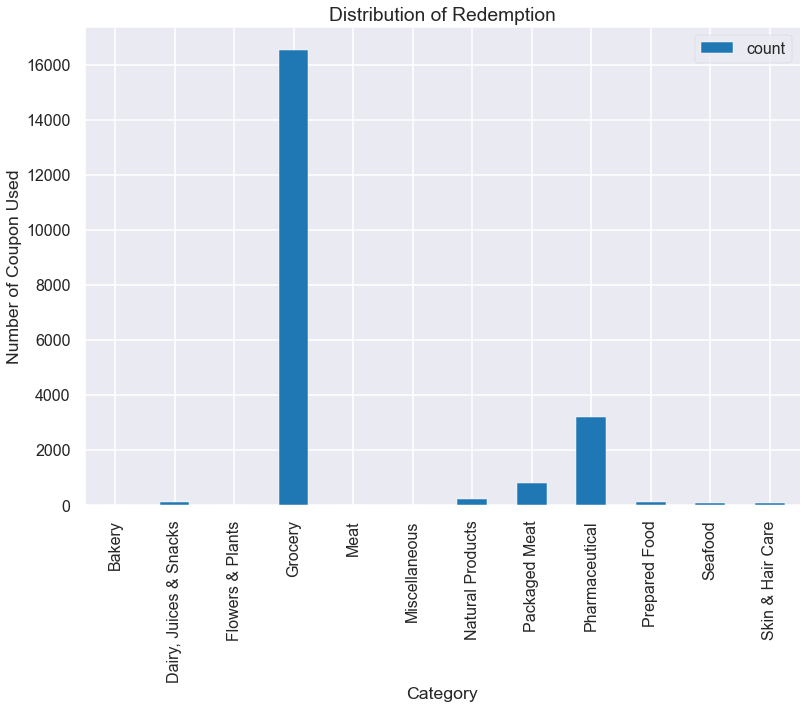

In [50]:
group_by_items.plot('category', 'count', kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Coupon Used')
plt.title('Distribution of Redemption')
plt.show()

## Campaign Information 

In [51]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date,duration
27,26,X,2012-08-12,2012-09-21,40
26,27,Y,2012-08-25,2012-10-27,63
25,28,Y,2012-09-16,2012-11-16,61
24,29,Y,2012-10-08,2012-11-30,53
23,30,X,2012-11-19,2013-01-04,46


## Data Transform

Transforming Customer Transactions into Customer Buying Habbit

In [52]:
cust_tran[cust_tran.item_id == 43]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
605219,2012-10-16,1044,43,8,71.24,-267.86,0.0


In [53]:
cust_tran['coupon_used']= cust_tran.coupon_discount.apply(lambda x:1 if x <0 else 0)
cust_tran['count']=1
cust_tran['total_discount'] = cust_tran['coupon_discount'] + cust_tran['other_discount']

### Aggregating customer transactions by `items_id` as `item_tran` 

In [54]:
item_tran = cust_tran.groupby('item_id').agg({
    'customer_id': ['nunique', 'count'],
    'quantity': ['mean','sum'],
    'count': 'sum',
    'coupon_used': 'sum',
    'selling_price': 'mean',
    'other_discount': ['mean', 'sum'],
    'coupon_discount': ['mean', 'sum'],
    'total_discount': ['mean','sum']
})

In [55]:
item_tran.columns = ['total_unique_cust_it', 'total_cust_it', 'avg_order_qnt_it', 'total_quantity_it', 'count_order_it','sum_cp_used_it', 
                            'avg_sprice_it', 'avg_odiscount_it', 'sum_oth_discount_it', 'avg_cdiscount_it', 'sum_cp_discount_it', 'avg_tdiscount_it', 'sum_to_discount_it']

### Merge the aggregated `item_tran` with item table  

In [56]:
item_tran = item_tran.merge(items, on = 'item_id', how = 'left')

In [57]:
item_tran.head()

,item_id,total_unique_cust_it,total_cust_it,avg_order_qnt_it,total_quantity_it,count_order_it,sum_cp_used_it,avg_sprice_it,avg_odiscount_it,sum_oth_discount_it,avg_cdiscount_it,sum_cp_discount_it,avg_tdiscount_it,sum_to_discount_it,brand,brand_type,category
0,1,2,2,1.0,2,2,0,124.31,0.0,0.0,0.0,0.0,0.0,0.0,1,Established,Grocery
1,2,1,1,1.0,1,1,0,35.26,0.0,0.0,0.0,0.0,0.0,0.0,1,Established,Miscellaneous
2,3,1,1,1.0,1,1,0,56.64,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Bakery
3,4,1,1,1.0,1,1,0,54.85,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Grocery
4,5,1,1,1.0,1,1,0,81.57,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Grocery


In [58]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [59]:
len(coupons.coupon_id.unique()), len(coupons.item_id.unique())

(1116, 36289)

### Merge coupon with `item_tran` as `cp_item_tram` 

In [60]:
cp_item_tran = pd.merge(coupons, item_tran, on = 'item_id', how = 'left' )
cp_item_tran

,coupon_id,item_id,total_unique_cust_it,total_cust_it,avg_order_qnt_it,total_quantity_it,count_order_it,sum_cp_used_it,avg_sprice_it,avg_odiscount_it,sum_oth_discount_it,avg_cdiscount_it,sum_cp_discount_it,avg_tdiscount_it,sum_to_discount_it,brand,brand_type,category
0,105,37,2.0,7.0,2.285714,16.0,7.0,0.0,113.120000,-17.557143,-122.90,0.0,0.0,-17.557143,-122.90,56.0,Local,Grocery
1,107,75,4.0,33.0,1.363636,45.0,33.0,0.0,47.787273,-5.159394,-170.26,0.0,0.0,-5.159394,-170.26,56.0,Local,Grocery
2,494,76,1.0,1.0,1.000000,1.0,1.0,0.0,89.050000,-17.450000,-17.45,0.0,0.0,-17.450000,-17.45,209.0,Established,Grocery
3,522,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery
4,518,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92658,32,69268,2.0,2.0,1.000000,2.0,2.0,0.0,320.220000,-35.620000,-71.24,0.0,0.0,-35.620000,-71.24,686.0,Established,Pharmaceutical
92659,32,68502,1.0,1.0,1.000000,1.0,1.0,0.0,355.840000,0.000000,0.00,0.0,0.0,0.000000,0.00,1009.0,Established,Pharmaceutical
92660,32,68612,1.0,1.0,1.000000,1.0,1.0,0.0,169.200000,0.000000,0.00,0.0,0.0,0.000000,0.00,1104.0,Established,Pharmaceutical
92661,33,71390,2.0,2.0,1.000000,2.0,2.0,0.0,255.575000,0.000000,0.00,0.0,0.0,0.000000,0.00,4196.0,Established,Meat


Above we see that one coupon is applied to multiple item.

In [61]:
cp_item_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   coupon_id             92663 non-null  int64  
 1   item_id               92663 non-null  int64  
 2   total_unique_cust_it  92655 non-null  float64
 3   total_cust_it         92655 non-null  float64
 4   avg_order_qnt_it      92655 non-null  float64
 5   total_quantity_it     92655 non-null  float64
 6   count_order_it        92655 non-null  float64
 7   sum_cp_used_it        92655 non-null  float64
 8   avg_sprice_it         92655 non-null  float64
 9   avg_odiscount_it      92655 non-null  float64
 10  sum_oth_discount_it   92655 non-null  float64
 11  avg_cdiscount_it      92655 non-null  float64
 12  sum_cp_discount_it    92655 non-null  float64
 13  avg_tdiscount_it      92655 non-null  float64
 14  sum_to_discount_it    92655 non-null  float64
 15  brand              

### Aggregating `cp_item_tran` on `coupon_id` 

### Removing columns of `cp_item_tran`

Since each aggregated features will be aggregated again by coupon_id, the name at the end _it indicating by item will be removed.

In [62]:
cols = list(cp_item_tran.columns)
for i, col in enumerate(cols):
    if col[-3:] =='_it':
        cols[i] = col[:-3]

cp_item_tran.columns = pd.Index(cols)

In [63]:
cp_item_tran.head()

,coupon_id,item_id,total_unique_cust,total_cust,avg_order_qnt,total_quantity,count_order,sum_cp_used,avg_sprice,avg_odiscount,sum_oth_discount,avg_cdiscount,sum_cp_discount,avg_tdiscount,sum_to_discount,brand,brand_type,category
0,105,37,2.0,7.0,2.285714,16.0,7.0,0.0,113.120000,-17.557143,-122.90,0.0,0.0,-17.557143,-122.90,56.0,Local,Grocery
1,107,75,4.0,33.0,1.363636,45.0,33.0,0.0,47.787273,-5.159394,-170.26,0.0,0.0,-5.159394,-170.26,56.0,Local,Grocery
2,494,76,1.0,1.0,1.000000,1.0,1.0,0.0,89.050000,-17.450000,-17.45,0.0,0.0,-17.450000,-17.45,209.0,Established,Grocery
3,522,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery
4,518,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery


In [64]:
cp_item_tran1 = cp_item_tran.groupby('coupon_id').agg({
                                    'item_id': 'nunique',
                                    'brand': 'nunique',
                                    'brand_type': lambda x: x.unique()[0] if (len(x.unique())==1) else 'Both',
                                    'category': lambda x: x.mode()[0],
                                    'count_order': 'sum',
                                    'sum_cp_used': 'sum',
                                    'total_cust': 'sum',
                                    'avg_sprice':'mean',
                                    'avg_odiscount': 'mean',
                                    'avg_cdiscount': 'mean',
                                    'avg_tdiscount': 'mean',
                                    'sum_cp_discount': 'sum',
                                    'sum_oth_discount': 'sum',
                                    'total_quantity' : 'sum',
                                    'sum_to_discount' : 'sum',
                        })


In [65]:
new_cols= {
                   'item_id': 'ct_items',#item count
                   'brand': 'ct_brands',
                   'category':'mode_cat'
    
                                  }
cp_item_tran1.rename(columns = new_cols, inplace = True)

In [66]:
cp_item_tran1['ct_cat']= cp_item_tran.groupby('coupon_id').agg({
                                         'category': 'nunique'})
                                        

In [67]:
train_cp_item_tran = pd.merge(train, cp_item_tran1, on ='coupon_id', how='left')
train_cp_item_tran

,id,campaign_id,coupon_id,customer_id,redemption_status,ct_items,ct_brands,brand_type,mode_cat,count_order,...,total_cust,avg_sprice,avg_odiscount,avg_cdiscount,avg_tdiscount,sum_cp_discount,sum_oth_discount,total_quantity,sum_to_discount,ct_cat
0,117578,8,725,45,0,61,1,Established,Grocery,2242.0,...,2242.0,64.750605,-17.981800,-0.196600,-18.178400,-988.37,-28479.89,3091.0,-29468.26,1
1,123337,29,265,334,0,6,1,Established,Pharmaceutical,116.0,...,116.0,292.564216,-5.938643,0.000000,-5.938643,0.00,-1086.46,119.0,-1086.46,1
2,46642,13,281,408,0,2,1,Established,Pharmaceutical,3.0,...,3.0,213.360000,0.000000,0.000000,0.000000,0.00,0.00,3.0,0.00,1
3,10510,13,625,577,0,92,1,Established,Grocery,2687.0,...,2687.0,96.963596,-29.136094,-0.880540,-30.016634,-3661.71,-73457.74,3004.0,-77119.45,1
4,14347,13,480,414,0,1,1,Established,Grocery,4.0,...,4.0,151.025000,-26.715000,-35.620000,-62.335000,-142.48,-106.86,4.0,-249.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54853,127422,9,18,690,0,27,2,Established,Grocery,848.0,...,848.0,107.053980,-16.775949,-0.308263,-17.084212,-482.28,-13456.80,924.0,-13939.08,1
54854,123176,13,561,705,0,2,1,Established,Pharmaceutical,6.0,...,6.0,1068.240000,-17.810000,0.000000,-17.810000,0.00,-178.10,6.0,-178.10,1
54855,59852,13,277,103,0,27,2,Established,Pharmaceutical,279.0,...,279.0,133.121715,-15.933779,0.000000,-15.933779,0.00,-4160.30,317.0,-4160.30,1
54856,65978,8,916,184,0,14,1,Established,Grocery,241.0,...,241.0,107.861133,-4.159547,-1.389180,-5.548727,-366.88,-1608.64,246.0,-1975.52,1


## Aggregating customer transaction on `customer_id` as a table `customer_history`

## Custormer transaction history

In [68]:
# test_cp_item_tran = pd.merge(test, cp_item_tran, on ='coupon_id', how='left')
# test_cp_item_tran
cust_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
 7   coupon_used      1324566 non-null  int64  
 8   count            1324566 non-null  int64  
 9   total_discount   1324566 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 101.1+ MB


In [69]:
customer_history = cust_tran.groupby('customer_id').agg({
    'item_id': ['nunique', 'count'],
    'quantity': ['mean','sum'],
    'coupon_used': ['mean','sum'],
    'selling_price': 'mean',
    'other_discount': ['mean', 'sum'],
    'coupon_discount': ['mean', 'sum'],
    'total_discount': ['mean', 'sum']
})

In [70]:
customer_history.columns = ['total_unique_items_cust', 'total_items_cust', 'avg_qnt_cust', 'total_quantity_cust', 'avg_cp_used_cust', 'sum_cp_used_cust', 
                            'avg_sprice_cust', 'avg_odiscount_cust', 'sum_oth_discount_cust', 'avg_cdiscount_cust', 'sum_cp_discount_cust', 'avg_tdiscount_cust', 'sum_to_discount_cust']
customer_history.columns

Index(['total_unique_items_cust', 'total_items_cust', 'avg_qnt_cust',
       'total_quantity_cust', 'avg_cp_used_cust', 'sum_cp_used_cust',
       'avg_sprice_cust', 'avg_odiscount_cust', 'sum_oth_discount_cust',
       'avg_cdiscount_cust', 'sum_cp_discount_cust', 'avg_tdiscount_cust',
       'sum_to_discount_cust'],
      dtype='object')

In [71]:
customer_history['sum_price_cust'] = customer_history['total_items_cust']*customer_history['avg_sprice_cust']

In [72]:
customer_history.reset_index(inplace = True)

### Merge the customer transaction history (`customer_history`) with customer demographics (`cust_demo`)

In [73]:
customer_history = customer_history.merge(cust_demo, on = 'customer_id', how = 'left')
customer_history.columns

Index(['customer_id', 'total_unique_items_cust', 'total_items_cust',
       'avg_qnt_cust', 'total_quantity_cust', 'avg_cp_used_cust',
       'sum_cp_used_cust', 'avg_sprice_cust', 'avg_odiscount_cust',
       'sum_oth_discount_cust', 'avg_cdiscount_cust', 'sum_cp_discount_cust',
       'avg_tdiscount_cust', 'sum_to_discount_cust', 'sum_price_cust',
       'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')

In [74]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  760 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


### Finally Merge the combined train and test tables

In [75]:
columns = train.columns[train.columns != 'redemption_status']
total_data = train[columns].append(test, sort=True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 23510
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   campaign_id  78369 non-null  int64
 1   coupon_id    78369 non-null  int64
 2   customer_id  78369 non-null  int64
 3   id           78369 non-null  int64
dtypes: int64(4)
memory usage: 3.0 MB


In [76]:
customer_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 0 to 1581
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1582 non-null   int64  
 1   total_unique_items_cust  1582 non-null   int64  
 2   total_items_cust         1582 non-null   int64  
 3   avg_qnt_cust             1582 non-null   float64
 4   total_quantity_cust      1582 non-null   int64  
 5   avg_cp_used_cust         1582 non-null   float64
 6   sum_cp_used_cust         1582 non-null   int64  
 7   avg_sprice_cust          1582 non-null   float64
 8   avg_odiscount_cust       1582 non-null   float64
 9   sum_oth_discount_cust    1582 non-null   float64
 10  avg_cdiscount_cust       1582 non-null   float64
 11  sum_cp_discount_cust     1582 non-null   float64
 12  avg_tdiscount_cust       1582 non-null   float64
 13  sum_to_discount_cust     1582 non-null   float64
 14  sum_price_cust          

In [77]:
total_data = pd.merge(total_data, customer_history, on = 'customer_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campaign_id              78369 non-null  int64  
 1   coupon_id                78369 non-null  int64  
 2   customer_id              78369 non-null  int64  
 3   id                       78369 non-null  int64  
 4   total_unique_items_cust  78369 non-null  int64  
 5   total_items_cust         78369 non-null  int64  
 6   avg_qnt_cust             78369 non-null  float64
 7   total_quantity_cust      78369 non-null  int64  
 8   avg_cp_used_cust         78369 non-null  float64
 9   sum_cp_used_cust         78369 non-null  int64  
 10  avg_sprice_cust          78369 non-null  float64
 11  avg_odiscount_cust       78369 non-null  float64
 12  sum_oth_discount_cust    78369 non-null  float64
 13  avg_cdiscount_cust       78369 non-null  float64
 14  sum_cp_discount_cust  

In [78]:
total_data = pd.merge(total_data, cp_item_tran1, on = 'coupon_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campaign_id              78369 non-null  int64  
 1   coupon_id                78369 non-null  int64  
 2   customer_id              78369 non-null  int64  
 3   id                       78369 non-null  int64  
 4   total_unique_items_cust  78369 non-null  int64  
 5   total_items_cust         78369 non-null  int64  
 6   avg_qnt_cust             78369 non-null  float64
 7   total_quantity_cust      78369 non-null  int64  
 8   avg_cp_used_cust         78369 non-null  float64
 9   sum_cp_used_cust         78369 non-null  int64  
 10  avg_sprice_cust          78369 non-null  float64
 11  avg_odiscount_cust       78369 non-null  float64
 12  sum_oth_discount_cust    78369 non-null  float64
 13  avg_cdiscount_cust       78369 non-null  float64
 14  sum_cp_discount_cust  

In [79]:
total_data = pd.merge(total_data, campaign, on = 'campaign_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_id              78369 non-null  int64         
 1   coupon_id                78369 non-null  int64         
 2   customer_id              78369 non-null  int64         
 3   id                       78369 non-null  int64         
 4   total_unique_items_cust  78369 non-null  int64         
 5   total_items_cust         78369 non-null  int64         
 6   avg_qnt_cust             78369 non-null  float64       
 7   total_quantity_cust      78369 non-null  int64         
 8   avg_cp_used_cust         78369 non-null  float64       
 9   sum_cp_used_cust         78369 non-null  int64         
 10  avg_sprice_cust          78369 non-null  float64       
 11  avg_odiscount_cust       78369 non-null  float64       
 12  sum_oth_discount_cust    78369 n

In [80]:
# test_data = pd.merge(test, customer_history, on = 'customer_id', how = 'left')
# test_data = pd.merge(test_data, campaign, on = 'campaign_id', how = 'left')
# test_data.info()

## Dealing with missing values again 

In [81]:
total_data.head()

,campaign_id,coupon_id,customer_id,id,total_unique_items_cust,total_items_cust,avg_qnt_cust,total_quantity_cust,avg_cp_used_cust,sum_cp_used_cust,...,avg_tdiscount,sum_cp_discount,sum_oth_discount,total_quantity,sum_to_discount,ct_cat,campaign_type,start_date,end_date,duration
0,8,725,45,117578,728,1338,109.359492,146323,0.121824,163,...,-18.178400,-988.37,-28479.89,3091.0,-29468.26,1,X,2013-02-16,2013-04-05,48
1,29,265,334,123337,198,225,1.102222,248,0.062222,14,...,-5.938643,0.00,-1086.46,119.0,-1086.46,1,Y,2012-10-08,2012-11-30,53
2,13,281,408,46642,396,575,10.222609,5878,0.006957,4,...,0.000000,0.00,0.00,3.0,0.00,1,X,2013-05-19,2013-07-05,47
3,13,625,577,10510,602,969,169.897833,164631,0.007224,7,...,-30.016634,-3661.71,-73457.74,3004.0,-77119.45,1,X,2013-05-19,2013-07-05,47
4,13,480,414,14347,566,1116,122.129928,136297,0.013441,15,...,-62.335000,-142.48,-106.86,4.0,-249.34,1,X,2013-05-19,2013-07-05,47


In [82]:
total_data.isna().sum()

campaign_id                    0
coupon_id                      0
customer_id                    0
id                             0
total_unique_items_cust        0
total_items_cust               0
avg_qnt_cust                   0
total_quantity_cust            0
avg_cp_used_cust               0
sum_cp_used_cust               0
avg_sprice_cust                0
avg_odiscount_cust             0
sum_oth_discount_cust          0
avg_cdiscount_cust             0
sum_cp_discount_cust           0
avg_tdiscount_cust             0
sum_to_discount_cust           0
sum_price_cust                 0
age_range                  34708
marital_status             34708
rented                     34708
family_size                34708
no_of_children             34708
income_bracket             34708
ct_items                       0
ct_brands                      0
brand_type                     0
mode_cat                       0
count_order                    0
sum_cp_used                    0
total_cust

In [83]:
total_data.age_range.value_counts()

46-55    15154
36-45    11210
26-35     8024
56-70     3723
70+       3094
18-25     2456
Name: age_range, dtype: int64

In [84]:
total_data.fillna({'age_range':'unknown'}, inplace=True)

### `martial_status`

In [85]:
total_data.marital_status.value_counts()

Married    18811
unknown    18267
Single      6583
Name: marital_status, dtype: int64

In [86]:
total_data.fillna({'marital_status':'unknown'}, inplace=True)

### `rented` 

In [87]:
total_data.rented.value_counts()

0.0    41156
1.0     2505
Name: rented, dtype: int64

In [88]:
total_data.rented.mean()

0.05737385767618699

In [89]:
total_data.fillna({'rented':0}, inplace=True)

### `family_size`

In [90]:
total_data.family_size.value_counts()

2     16888
1     13612
3      6267
5+     3755
4      3139
Name: family_size, dtype: int64

In [91]:
total_data.fillna({'family_size':'1'}, inplace=True)

### `no_of_children`

In [92]:
total_data.fillna({'no_of_children':0}, inplace=True)

### `income_bracket`

In [93]:
total_data.fillna({'income_bracket':5}, inplace=True)

In [94]:
total_data.head()

,campaign_id,coupon_id,customer_id,id,total_unique_items_cust,total_items_cust,avg_qnt_cust,total_quantity_cust,avg_cp_used_cust,sum_cp_used_cust,...,avg_tdiscount,sum_cp_discount,sum_oth_discount,total_quantity,sum_to_discount,ct_cat,campaign_type,start_date,end_date,duration
0,8,725,45,117578,728,1338,109.359492,146323,0.121824,163,...,-18.178400,-988.37,-28479.89,3091.0,-29468.26,1,X,2013-02-16,2013-04-05,48
1,29,265,334,123337,198,225,1.102222,248,0.062222,14,...,-5.938643,0.00,-1086.46,119.0,-1086.46,1,Y,2012-10-08,2012-11-30,53
2,13,281,408,46642,396,575,10.222609,5878,0.006957,4,...,0.000000,0.00,0.00,3.0,0.00,1,X,2013-05-19,2013-07-05,47
3,13,625,577,10510,602,969,169.897833,164631,0.007224,7,...,-30.016634,-3661.71,-73457.74,3004.0,-77119.45,1,X,2013-05-19,2013-07-05,47
4,13,480,414,14347,566,1116,122.129928,136297,0.013441,15,...,-62.335000,-142.48,-106.86,4.0,-249.34,1,X,2013-05-19,2013-07-05,47


## Derive new variables

In [95]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_id              78369 non-null  int64         
 1   coupon_id                78369 non-null  int64         
 2   customer_id              78369 non-null  int64         
 3   id                       78369 non-null  int64         
 4   total_unique_items_cust  78369 non-null  int64         
 5   total_items_cust         78369 non-null  int64         
 6   avg_qnt_cust             78369 non-null  float64       
 7   total_quantity_cust      78369 non-null  int64         
 8   avg_cp_used_cust         78369 non-null  float64       
 9   sum_cp_used_cust         78369 non-null  int64         
 10  avg_sprice_cust          78369 non-null  float64       
 11  avg_odiscount_cust       78369 non-null  float64       
 12  sum_oth_discount_cust    78369 n

In [96]:
X=total_data[[i for i in list(total_data.columns) if i not in ['start_date','end_date']]]
print(X.columns)
X.info()

Index(['campaign_id', 'coupon_id', 'customer_id', 'id',
       'total_unique_items_cust', 'total_items_cust', 'avg_qnt_cust',
       'total_quantity_cust', 'avg_cp_used_cust', 'sum_cp_used_cust',
       'avg_sprice_cust', 'avg_odiscount_cust', 'sum_oth_discount_cust',
       'avg_cdiscount_cust', 'sum_cp_discount_cust', 'avg_tdiscount_cust',
       'sum_to_discount_cust', 'sum_price_cust', 'age_range', 'marital_status',
       'rented', 'family_size', 'no_of_children', 'income_bracket', 'ct_items',
       'ct_brands', 'brand_type', 'mode_cat', 'count_order', 'sum_cp_used',
       'total_cust', 'avg_sprice', 'avg_odiscount', 'avg_cdiscount',
       'avg_tdiscount', 'sum_cp_discount', 'sum_oth_discount',
       'total_quantity', 'sum_to_discount', 'ct_cat', 'campaign_type',
       'duration'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------ 

In [97]:
X1=X[['age_range','marital_status']]

In [98]:
X1=pd.get_dummies(X1)

In [99]:
X1.columns

Index(['age_range_18-25', 'age_range_26-35', 'age_range_36-45',
       'age_range_46-55', 'age_range_56-70', 'age_range_70+',
       'age_range_unknown', 'marital_status_Married', 'marital_status_Single',
       'marital_status_unknown'],
      dtype='object')

In [100]:
for col in X1.columns:
    if 'unknown' in col:
        X1.drop(col,axis=1,inplace=True)
X1.columns

Index(['age_range_18-25', 'age_range_26-35', 'age_range_36-45',
       'age_range_46-55', 'age_range_56-70', 'age_range_70+',
       'marital_status_Married', 'marital_status_Single'],
      dtype='object')

In [101]:
X.drop(['age_range','marital_status'], axis=1, inplace = True)

C:\Users\shubham.raut\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
X = pd.get_dummies(X, drop_first=True)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   campaign_id                      78369 non-null  int64  
 1   coupon_id                        78369 non-null  int64  
 2   customer_id                      78369 non-null  int64  
 3   id                               78369 non-null  int64  
 4   total_unique_items_cust          78369 non-null  int64  
 5   total_items_cust                 78369 non-null  int64  
 6   avg_qnt_cust                     78369 non-null  float64
 7   total_quantity_cust              78369 non-null  int64  
 8   avg_cp_used_cust                 78369 non-null  float64
 9   sum_cp_used_cust                 78369 non-null  int64  
 10  avg_sprice_cust                  78369 non-null  float64
 11  avg_odiscount_cust               78369 non-null  float64
 12  sum_oth_discount_c

In [104]:
X = X.join(X1)

In [105]:
X.columns

Index(['campaign_id', 'coupon_id', 'customer_id', 'id',
       'total_unique_items_cust', 'total_items_cust', 'avg_qnt_cust',
       'total_quantity_cust', 'avg_cp_used_cust', 'sum_cp_used_cust',
       'avg_sprice_cust', 'avg_odiscount_cust', 'sum_oth_discount_cust',
       'avg_cdiscount_cust', 'sum_cp_discount_cust', 'avg_tdiscount_cust',
       'sum_to_discount_cust', 'sum_price_cust', 'rented', 'income_bracket',
       'ct_items', 'ct_brands', 'count_order', 'sum_cp_used', 'total_cust',
       'avg_sprice', 'avg_odiscount', 'avg_cdiscount', 'avg_tdiscount',
       'sum_cp_discount', 'sum_oth_discount', 'total_quantity',
       'sum_to_discount', 'ct_cat', 'duration', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'brand_type_Established', 'brand_type_Local',
       'mode_cat_Dairy, Juices & Snacks', 'mode_cat_Flowers & Plants',
       'mode_cat_Grocery', 'mod

# Reduce dimensionality by removing collinearity. 

In [106]:
def strongCorr(df, limit):
    corrMat = df.corr()
    removed_cols = []
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            print('the correlation is higher than {} with {}'.format(limit, col),
                  '\n',corrMat.loc[abs(corrMat[col])>limit][col],'\n')
            removed_cols.append(col)
    return removed_cols

In [107]:
removed_cols = strongCorr(X,0.8)

the correlation is higher than 0.8 with total_unique_items_cust 
 total_unique_items_cust    1.000000
total_items_cust           0.930814
sum_oth_discount_cust     -0.819335
sum_to_discount_cust      -0.813050
sum_price_cust             0.857266
Name: total_unique_items_cust, dtype: float64 

the correlation is higher than 0.8 with total_items_cust 
 total_unique_items_cust    0.930814
total_items_cust           1.000000
sum_oth_discount_cust     -0.853129
sum_to_discount_cust      -0.845607
sum_price_cust             0.917467
Name: total_items_cust, dtype: float64 

the correlation is higher than 0.8 with avg_qnt_cust 
 avg_qnt_cust           1.000000
total_quantity_cust    0.813917
Name: avg_qnt_cust, dtype: float64 

the correlation is higher than 0.8 with total_quantity_cust 
 avg_qnt_cust           0.813917
total_quantity_cust    1.000000
Name: total_quantity_cust, dtype: float64 

the correlation is higher than 0.8 with avg_cp_used_cust 
 avg_cp_used_cust      1.000000
sum_cp_use

In [108]:
removed_cols

['total_unique_items_cust',
 'total_items_cust',
 'avg_qnt_cust',
 'total_quantity_cust',
 'avg_cp_used_cust',
 'sum_cp_used_cust',
 'avg_odiscount_cust',
 'sum_oth_discount_cust',
 'avg_cdiscount_cust',
 'sum_cp_discount_cust',
 'avg_tdiscount_cust',
 'sum_to_discount_cust',
 'sum_price_cust',
 'ct_items',
 'count_order',
 'sum_cp_used',
 'total_cust',
 'avg_odiscount',
 'avg_tdiscount',
 'sum_cp_discount',
 'sum_oth_discount',
 'total_quantity',
 'sum_to_discount',
 'family_size_3',
 'family_size_4',
 'family_size_5+',
 'no_of_children_1',
 'no_of_children_2',
 'no_of_children_3+',
 'brand_type_Established',
 'brand_type_Local']

In [109]:
meaningful_cols = ['mode_cat_Grocery',
'sum_price_cust',
 'ct_cat',
 'avg_cp_used_cust',
 'avg_odiscount',
 'ct_brands',
 'sum_cp_used',
 'no_of_children_2',
 'brand_type_Established',
 'no_of_children_3+',
 'avg_qnt_cust']

In [110]:
removed_cols = [i for i in removed_cols if i not in meaningful_cols]

In [111]:
# x_reduced = X
# while(len(removed_cols)):
#     x_reduced = x_reduced.drop(removed_cols[0], axis = 1)
#     removed_cols = strongCorr(x_reduced,0.7)

In [112]:
x_reduced = X.drop(removed_cols, axis=1)

In [113]:
x_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   campaign_id                      78369 non-null  int64  
 1   coupon_id                        78369 non-null  int64  
 2   customer_id                      78369 non-null  int64  
 3   id                               78369 non-null  int64  
 4   avg_qnt_cust                     78369 non-null  float64
 5   avg_cp_used_cust                 78369 non-null  float64
 6   avg_sprice_cust                  78369 non-null  float64
 7   sum_price_cust                   78369 non-null  float64
 8   rented                           78369 non-null  float64
 9   income_bracket                   78369 non-null  float64
 10  ct_brands                        78369 non-null  int64  
 11  sum_cp_used                      78369 non-null  float64
 12  avg_sprice        

In [114]:
strongCorr(x_reduced,0.7)

the correlation is higher than 0.7 with mode_cat_Grocery 
 mode_cat_Grocery           1.000000
mode_cat_Pharmaceutical   -0.775381
Name: mode_cat_Grocery, dtype: float64 

the correlation is higher than 0.7 with mode_cat_Pharmaceutical 
 mode_cat_Grocery          -0.775381
mode_cat_Pharmaceutical    1.000000
Name: mode_cat_Pharmaceutical, dtype: float64 



['mode_cat_Grocery', 'mode_cat_Pharmaceutical']

In [115]:
x_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   campaign_id                      78369 non-null  int64  
 1   coupon_id                        78369 non-null  int64  
 2   customer_id                      78369 non-null  int64  
 3   id                               78369 non-null  int64  
 4   avg_qnt_cust                     78369 non-null  float64
 5   avg_cp_used_cust                 78369 non-null  float64
 6   avg_sprice_cust                  78369 non-null  float64
 7   sum_price_cust                   78369 non-null  float64
 8   rented                           78369 non-null  float64
 9   income_bracket                   78369 non-null  float64
 10  ct_brands                        78369 non-null  int64  
 11  sum_cp_used                      78369 non-null  float64
 12  avg_sprice        

In [116]:
train_data = train[['id','redemption_status']].merge(x_reduced, on='id', how='left')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54858 entries, 0 to 54857
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               54858 non-null  int64  
 1   redemption_status                54858 non-null  int64  
 2   campaign_id                      54858 non-null  int64  
 3   coupon_id                        54858 non-null  int64  
 4   customer_id                      54858 non-null  int64  
 5   avg_qnt_cust                     54858 non-null  float64
 6   avg_cp_used_cust                 54858 non-null  float64
 7   avg_sprice_cust                  54858 non-null  float64
 8   sum_price_cust                   54858 non-null  float64
 9   rented                           54858 non-null  float64
 10  income_bracket                   54858 non-null  float64
 11  ct_brands                        54858 non-null  int64  
 12  sum_cp_used       

In [117]:
test_data = test[['id']].merge(x_reduced, on='id', how='left')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23511 entries, 0 to 23510
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               23511 non-null  int64  
 1   campaign_id                      23511 non-null  int64  
 2   coupon_id                        23511 non-null  int64  
 3   customer_id                      23511 non-null  int64  
 4   avg_qnt_cust                     23511 non-null  float64
 5   avg_cp_used_cust                 23511 non-null  float64
 6   avg_sprice_cust                  23511 non-null  float64
 7   sum_price_cust                   23511 non-null  float64
 8   rented                           23511 non-null  float64
 9   income_bracket                   23511 non-null  float64
 10  ct_brands                        23511 non-null  int64  
 11  sum_cp_used                      23511 non-null  float64
 12  avg_sprice        

### Saving processed data to csv file

In [118]:
import sqlite3
con = sqlite3.connect('final_dataset.db')

In [119]:
train_data.to_sql('train', con, if_exists='replace', index = False)

C:\Users\shubham.raut\Anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [120]:
test_data.to_sql('test', con, if_exists='replace', index = False)

## Performaing EDA 

### Q1 Can you provide customer insights (by demographics, income, personal life, lifestyle etc.) and their propensity to redeem a coupon 

In [121]:
total_data = train[['id','redemption_status']].merge(total_data, on='id', how='left')

In [122]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54858 entries, 0 to 54857
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       54858 non-null  int64         
 1   redemption_status        54858 non-null  int64         
 2   campaign_id              54858 non-null  int64         
 3   coupon_id                54858 non-null  int64         
 4   customer_id              54858 non-null  int64         
 5   total_unique_items_cust  54858 non-null  int64         
 6   total_items_cust         54858 non-null  int64         
 7   avg_qnt_cust             54858 non-null  float64       
 8   total_quantity_cust      54858 non-null  int64         
 9   avg_cp_used_cust         54858 non-null  float64       
 10  sum_cp_used_cust         54858 non-null  int64         
 11  avg_sprice_cust          54858 non-null  float64       
 12  avg_odiscount_cust       54858 n

In [123]:
cp_not_used=total_data[total_data.redemption_status==0]
cp_used=total_data[total_data.redemption_status==1]

In [124]:
cp_not_used.age_range.value_counts()

unknown    24277
46-55      10425
36-45       7732
26-35       5524
56-70       2540
70+         2149
18-25       1693
Name: age_range, dtype: int64

In [125]:
cp_used.age_range.value_counts()

46-55      144
unknown    123
36-45      101
26-35       78
56-70       36
70+         23
18-25       13
Name: age_range, dtype: int64

In [126]:
total_data.age_range.unique()

array(['46-55', 'unknown', '70+', '26-35', '36-45', '56-70', '18-25'],
      dtype=object)

In [127]:
cp_not_used_age_ct = [1693, 5524, 7732, 10425, 2540, 2149]
cp_used_age_ct = [13, 78, 101, 144, 36, 23]
age_keys = [ '18-25', '26-35', '36-45', '46-55', '56-70', '70+']

In [128]:
total = total_data.age_range.value_counts()
total

unknown    24400
46-55      10569
36-45       7833
26-35       5602
56-70       2576
70+         2172
18-25       1706
Name: age_range, dtype: int64

In [129]:
redeem = cp_used.age_range.value_counts()
redeem

46-55      144
unknown    123
36-45      101
26-35       78
56-70       36
70+         23
18-25       13
Name: age_range, dtype: int64

In [130]:
redeem_per = {}
k = list(redeem.keys())
for key, value in total.items():
    if key in k:
        redeem_per[key] = (redeem[key]/value)*100
    else:
                                  redeem_per[key] = 0
                                  
redeem_per

{'unknown': 0.5040983606557377,
 '46-55': 1.3624751632131706,
 '36-45': 1.2894165709179113,
 '26-35': 1.3923598714744734,
 '56-70': 1.3975155279503106,
 '70+': 1.0589318600368325,
 '18-25': 0.7620164126611958}

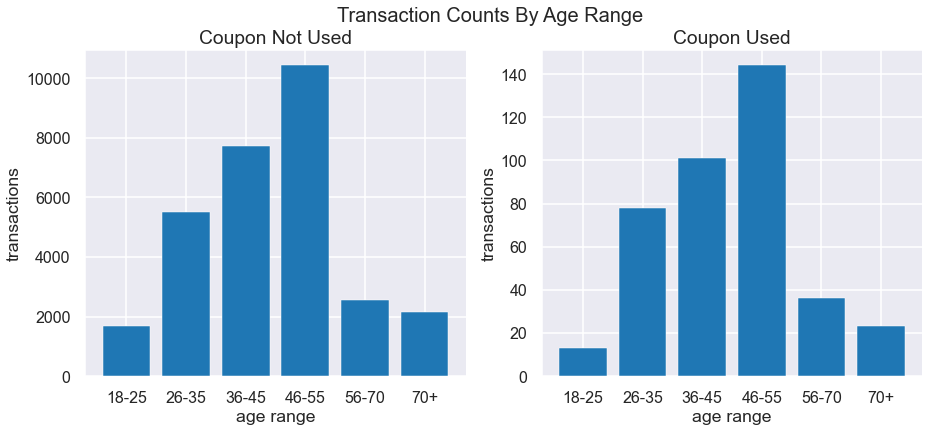

In [131]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

axes[0].bar(age_keys,cp_not_used_age_ct,align ='center')
axes[0].set_ylabel('transactions')
axes[0].set_xlabel('age range')
axes[0].set_title('coupon not used'.title())

axes[1].bar(age_keys,cp_used_age_ct,align ='center')
axes[1].set_ylabel('transactions')
axes[1].set_xlabel('age range')
axes[1].set_title('coupon used'.title())


plt.suptitle('transaction counts by age range'.title(), fontsize = 20)
plt.show()

Even though age group 46-55 have made the most redemptions. The age group 26-35, 36-45, 56-70 have almost same redemption percentage with respect to number of transactions in each age group.

In [132]:
cp_used.income_bracket.value_counts()

5.0     281
6.0      65
4.0      55
3.0      23
1.0      23
9.0      19
8.0      18
2.0      18
7.0      11
10.0      5
Name: income_bracket, dtype: int64

In [133]:
cp_not_used.income_bracket.value_counts()

5.0     31767
4.0      6035
6.0      3373
2.0      2715
3.0      2680
1.0      2423
8.0      1650
9.0      1370
7.0      1235
12.0      570
10.0      354
11.0      168
Name: income_bracket, dtype: int64

In [134]:
total = total_data.income_bracket.value_counts()
total

5.0     32048
4.0      6090
6.0      3438
2.0      2733
3.0      2703
1.0      2446
8.0      1668
9.0      1389
7.0      1246
12.0      570
10.0      359
11.0      168
Name: income_bracket, dtype: int64

In [135]:
redeem = cp_used.income_bracket.value_counts()
redeem

5.0     281
6.0      65
4.0      55
3.0      23
1.0      23
9.0      19
8.0      18
2.0      18
7.0      11
10.0      5
Name: income_bracket, dtype: int64

In [136]:
redeem_per = {}
k = list(redeem.keys())
for key, value in total.items():
    if key in k:
        redeem_per[key] = (redeem[key]/value)*100
    else:
                                  redeem_per[key] = 0
                                  
redeem_per

{5.0: 0.876809785322017,
 4.0: 0.9031198686371099,
 6.0: 1.890634089586969,
 2.0: 0.6586169045005488,
 3.0: 0.8509064002959674,
 1.0: 0.9403107113654947,
 8.0: 1.079136690647482,
 9.0: 1.3678905687544995,
 7.0: 0.8828250401284109,
 12.0: 0,
 10.0: 1.392757660167131,
 11.0: 0}

In [137]:
cp_not_used_income_ct = [2423, 2715, 2680, 6035, 31767, 3373, 1235, 1650, 1370, 354, 168, 570]
cp_used_income_ct = [23, 18, 23, 55, 281, 65, 11, 18, 19, 5, 0, 0]
income_keys = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

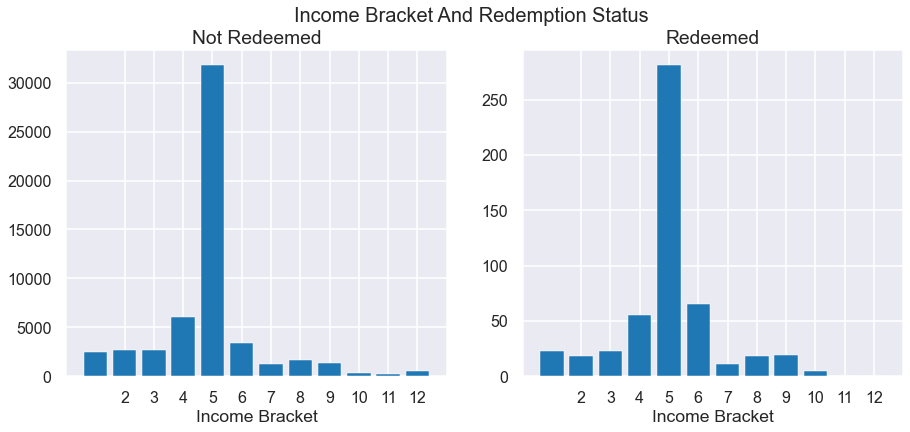

In [138]:

fig, axes = plt.subplots(1,2, figsize =(15,6))
axes[0].bar(income_keys,cp_not_used_income_ct,align ='center')
axes[0].set_title('Not Redeemed')
axes[0].set_xticks(range(1,13,1))
axes[0].set_xlabel('Income Bracket')
axes[1].bar(income_keys,cp_used_income_ct,align ='center')
axes[1].set_title('Redeemed')
axes[1].set_xticks(range(1,13,1))
axes[1].set_xlabel('Income Bracket')
plt.suptitle('Income bracket and redemption status'.title(),fontsize = 20)
plt.show()

In term of count, the income bracket 5 as most number of redemption. But when compare the redemption percentage with respect to number of transactions in each income bracket, the income bracket 6 as more redemption

In [139]:
cp_not_used.marital_status.value_counts()

unknown    36879
Married    12886
Single      4575
Name: marital_status, dtype: int64

In [140]:
cp_used.marital_status.value_counts()

unknown    261
Married    194
Single      63
Name: marital_status, dtype: int64

In [141]:
cp_not_used_marital_ct = [12886, 4575]
cp_used_marital_ct = [194, 63]
marital_keys = [ 'Married', 'Single']

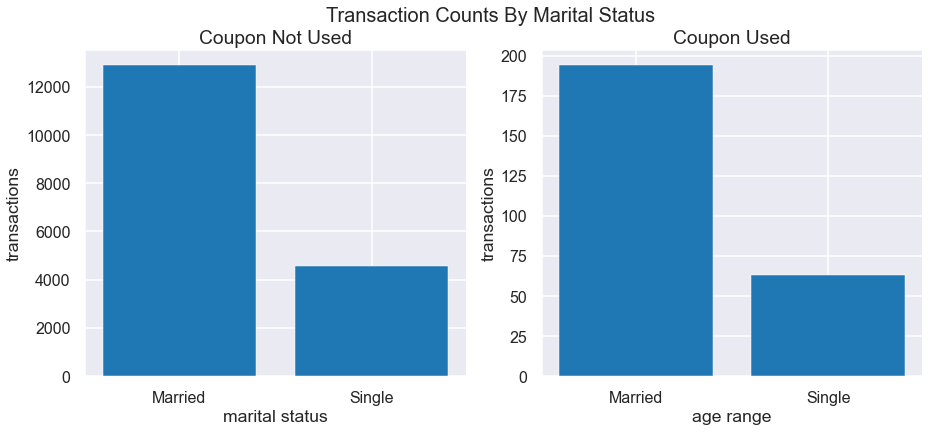

In [142]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

axes[0].bar(marital_keys,cp_not_used_marital_ct,align ='center')
axes[0].set_ylabel('transactions')
axes[0].set_xlabel('marital status')
axes[0].set_title('coupon not used'.title())

axes[1].bar(marital_keys,cp_used_marital_ct,align ='center')
axes[1].set_ylabel('transactions')
axes[1].set_xlabel('age range')
axes[1].set_title('coupon used'.title())


plt.suptitle('transaction counts by marital status'.title(), fontsize = 20)
plt.show()

In [143]:
cp_not_used.family_size.value_counts()

1     33617
2     11712
3      4310
5+     2600
4      2101
Name: family_size, dtype: int64

In [144]:
redeem = cp_used.family_size.value_counts()
redeem

1     245
2     156
4      43
5+     37
3      37
Name: family_size, dtype: int64

In [145]:
total = total_data.family_size.value_counts()
total

1     33862
2     11868
3      4347
5+     2637
4      2144
Name: family_size, dtype: int64

In [146]:
redeem_per = {}
k = list(redeem.keys())
for key, value in total.items():
    if key in k:
        redeem_per[key] = (redeem[key]/value)*100
    else:
                                  redeem_per[key] = 0
                                  
redeem_per

{'1': 0.7235248951627192,
 '2': 1.314459049544995,
 '3': 0.8511617207269382,
 '5+': 1.4031095942358742,
 '4': 2.0055970149253732}

In [147]:
cp_used_family_ct = [245, 156, 37, 43, 37]
cp_not_used_family_ct = [33617, 11712, 4310, 2101, 2600]
family_keys = [ '1', '2', '3', '4', '5+']

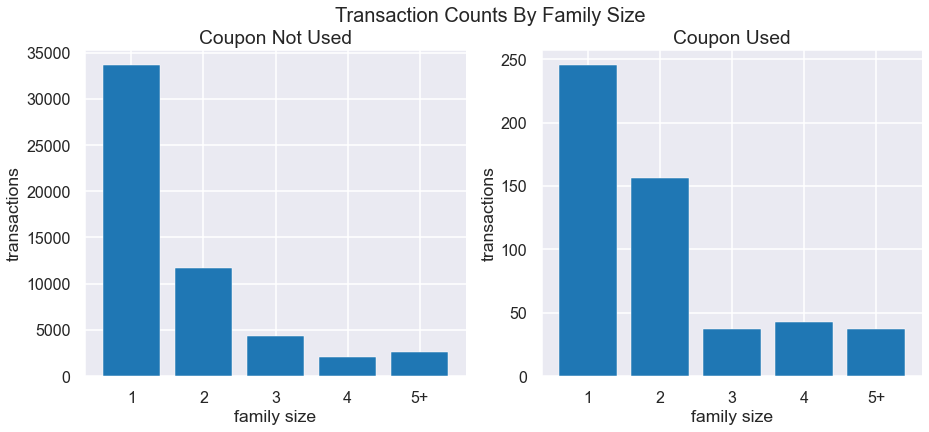

In [148]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

axes[0].bar(family_keys,cp_not_used_family_ct,align ='center')
axes[0].set_ylabel('transactions')
axes[0].set_xlabel('family size')
axes[0].set_title('coupon not used'.title())

axes[1].bar(family_keys,cp_used_family_ct,align ='center')
axes[1].set_ylabel('transactions')
axes[1].set_xlabel('family size')
axes[1].set_title('coupon used'.title())


plt.suptitle('transaction counts by family size'.title(), fontsize = 20)
plt.show()

In term of count, the family size 1 as most number of redemption. But when compare to the redemption percentage with respect to number of transactions in each family size group, the family size 4 as more redemption.

###  Q2 coupons should be used more by the organization in the upcoming days and which coupons the company should discard?

In [149]:
cp_item_tran.head()

,coupon_id,item_id,total_unique_cust,total_cust,avg_order_qnt,total_quantity,count_order,sum_cp_used,avg_sprice,avg_odiscount,sum_oth_discount,avg_cdiscount,sum_cp_discount,avg_tdiscount,sum_to_discount,brand,brand_type,category
0,105,37,2.0,7.0,2.285714,16.0,7.0,0.0,113.120000,-17.557143,-122.90,0.0,0.0,-17.557143,-122.90,56.0,Local,Grocery
1,107,75,4.0,33.0,1.363636,45.0,33.0,0.0,47.787273,-5.159394,-170.26,0.0,0.0,-5.159394,-170.26,56.0,Local,Grocery
2,494,76,1.0,1.0,1.000000,1.0,1.0,0.0,89.050000,-17.450000,-17.45,0.0,0.0,-17.450000,-17.45,209.0,Established,Grocery
3,522,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery
4,518,77,2.0,2.0,1.000000,2.0,2.0,0.0,70.350000,-16.920000,-33.84,0.0,0.0,-16.920000,-33.84,278.0,Established,Grocery


In [150]:
#len(train_cp_item_tran.customer_id.unique())

In [151]:
not_redeemed = cp_item_tran[cp_item_tran.sum_cp_used == 0]
redeemed = cp_item_tran[cp_item_tran.sum_cp_used > 0]

In [152]:
total = cp_item_tran.category.value_counts()

In [153]:
redeem = redeemed.category.value_counts()

In [154]:
redeem_per = {}
k = list(redeem.keys())
for key, value in total.items():
    if key in k:
        redeem_per[key] = (redeem[key]/value)*100
    else:
                                  redeem_per[key] = 0
                                  
redeem_per

{'Grocery': 22.192359377999615,
 'Pharmaceutical': 14.371807151979565,
 'Natural Products': 5.08872268661094,
 'Meat': 0.24123512383403023,
 'Packaged Meat': 15.087890625,
 'Skin & Hair Care': 3.5337124289195776,
 'Seafood': 12.393354288280198,
 'Flowers & Plants': 0.15282730514518594,
 'Dairy, Juices & Snacks': 2.196036422067488,
 'Garden': 0,
 'Prepared Food': 10.833333333333334,
 'Miscellaneous': 1.6304347826086956,
 'Bakery': 4.0,
 'Salads': 0,
 'Travel': 0,
 'Vegetables (cut)': 0,
 'Restauarant': 0}

In [155]:
not_redeemed.category.value_counts()

Grocery                   28371
Pharmaceutical            21455
Natural Products           6472
Meat                       6203
Packaged Meat              5217
Skin & Hair Care           4750
Flowers & Plants           1960
Seafood                    1951
Dairy, Juices & Snacks     1826
Garden                      286
Prepared Food               214
Miscellaneous               181
Salads                      100
Bakery                       96
Travel                       44
Vegetables (cut)             19
Restauarant                   1
Name: category, dtype: int64

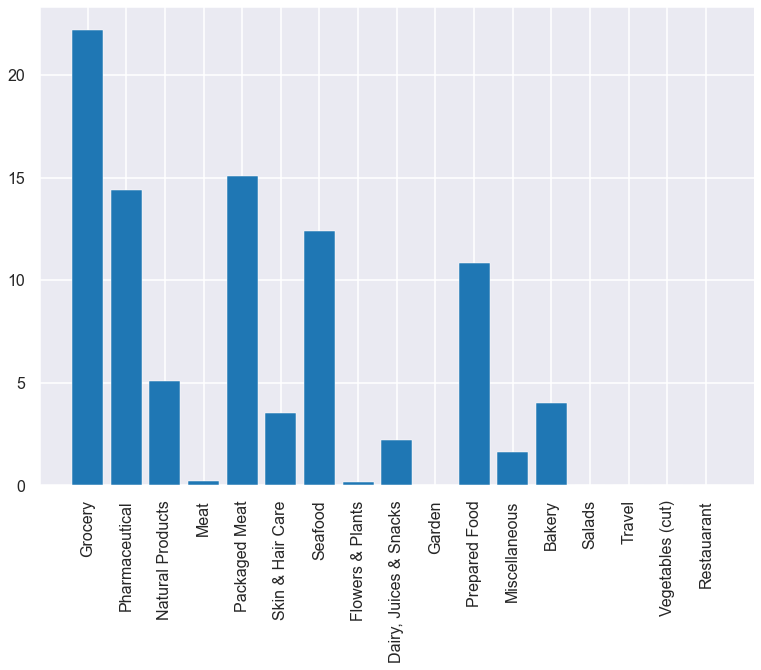

In [156]:
plt.bar(range(len(redeem_per)), list(redeem_per.values()), align='center')
plt.xticks(range(len(redeem_per)), list(redeem_per.keys()), rotation= 90)
plt.show()

1. Coupons are applied to Garden, Salads, Travel, Vegetables, Restaurant are never redeemed. So this coupons can be discarded.
2. 22% out of total coupon applied to grocery is redeemed. Similar 14% out of total coupons applied to the Pharmaceutical is redeemed.  so the organization should focus on the coupon that applies to this category.


### Q3 profile the products/items based on various characteristics like price, item category, propensity to be sold, discount percentage

In [157]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [158]:
item_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74063 entries, 0 to 74062
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               74063 non-null  int64  
 1   total_unique_cust_it  74063 non-null  int64  
 2   total_cust_it         74063 non-null  int64  
 3   avg_order_qnt_it      74063 non-null  float64
 4   total_quantity_it     74063 non-null  int64  
 5   count_order_it        74063 non-null  int64  
 6   sum_cp_used_it        74063 non-null  int64  
 7   avg_sprice_it         74063 non-null  float64
 8   avg_odiscount_it      74063 non-null  float64
 9   sum_oth_discount_it   74063 non-null  float64
 10  avg_cdiscount_it      74063 non-null  float64
 11  sum_cp_discount_it    74063 non-null  float64
 12  avg_tdiscount_it      74063 non-null  float64
 13  sum_to_discount_it    74063 non-null  float64
 14  brand                 74063 non-null  int64  
 15  brand_type         

In [159]:
set(items.item_id.unique())- set(item_tran.item_id.unique())

{1192, 42649, 70763}

3 items are never bought 

In [160]:
cp_used_item = item_tran[item_tran.avg_cdiscount_it < 0]
cp_not_used_item = item_tran[item_tran.avg_cdiscount_it == 0]

In [161]:
cp_not_used_item

,item_id,total_unique_cust_it,total_cust_it,avg_order_qnt_it,total_quantity_it,count_order_it,sum_cp_used_it,avg_sprice_it,avg_odiscount_it,sum_oth_discount_it,avg_cdiscount_it,sum_cp_discount_it,avg_tdiscount_it,sum_to_discount_it,brand,brand_type,category
0,1,2,2,1.0,2,2,0,124.31,0.0,0.0,0.0,0.0,0.0,0.0,1,Established,Grocery
1,2,1,1,1.0,1,1,0,35.26,0.0,0.0,0.0,0.0,0.0,0.0,1,Established,Miscellaneous
2,3,1,1,1.0,1,1,0,56.64,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Bakery
3,4,1,1,1.0,1,1,0,54.85,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Grocery
4,5,1,1,1.0,1,1,0,81.57,0.0,0.0,0.0,0.0,0.0,0.0,56,Local,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74058,74062,1,1,1.0,1,1,0,447.03,0.0,0.0,0.0,0.0,0.0,0.0,5490,Established,Pharmaceutical
74059,74063,1,1,1.0,1,1,0,414.97,0.0,0.0,0.0,0.0,0.0,0.0,5497,Established,Pharmaceutical
74060,74064,1,1,1.0,1,1,0,414.97,0.0,0.0,0.0,0.0,0.0,0.0,5497,Established,Pharmaceutical
74061,74065,1,1,1.0,1,1,0,127.88,0.0,0.0,0.0,0.0,0.0,0.0,5520,Established,Pharmaceutical


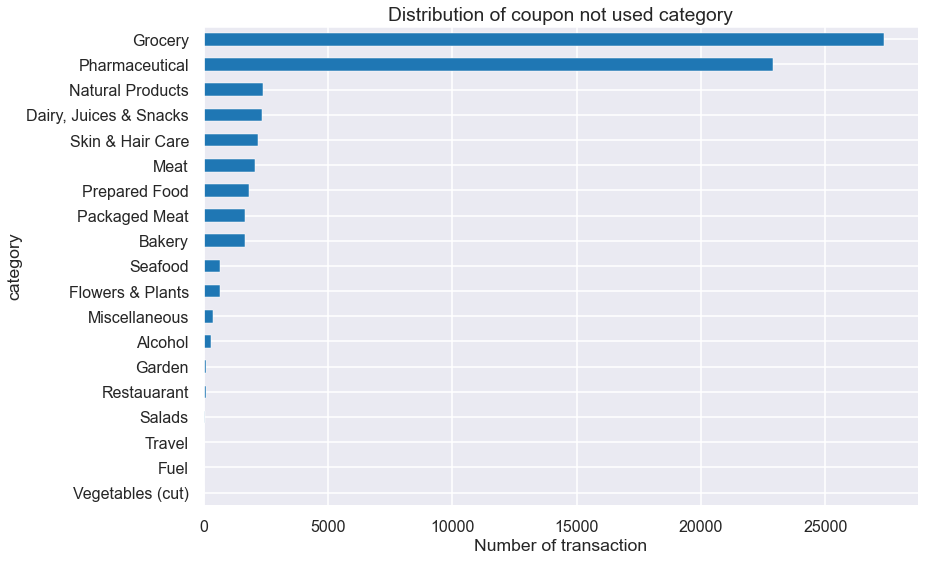

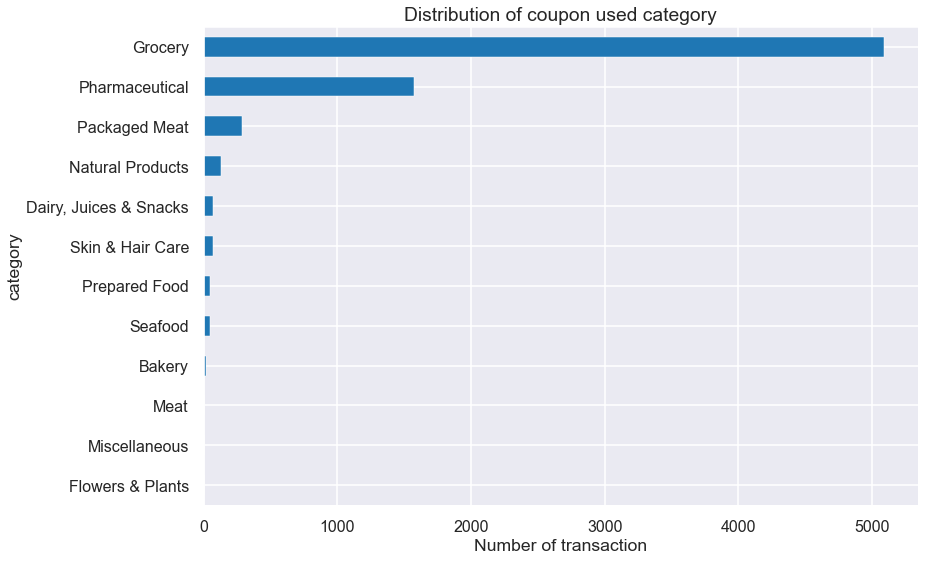

In [162]:
cp_not_used_item.category.value_counts().plot(kind='barh')
plt.ylabel('category')
plt.xlabel('Number of transaction')
plt.title('Distribution of coupon not used category')
plt.gca().invert_yaxis()
plt.show()

cp_used_item.category.value_counts().plot(kind='barh')
plt.ylabel('category')
plt.xlabel('Number of transaction')
plt.title('Distribution of coupon used category')
plt.gca().invert_yaxis()
plt.show()

In [163]:
group_by_cat = item_tran.groupby('category').agg({'total_quantity_it' : 'sum', 
                                                  'avg_sprice_it' : 'mean',
                                                  'avg_cdiscount_it' : 'mean',
                                                 'avg_tdiscount_it' : 'mean'})
group_by_cat.reset_index(inplace = True)
group_by_cat

,category,total_quantity_it,avg_sprice_it,avg_cdiscount_it,avg_tdiscount_it
0,Alcohol,1477,417.714023,0.000000,0.000000
1,Bakery,25075,151.190944,-0.192510,-8.746895
2,"Dairy, Juices & Snacks",27552,114.594640,-0.352278,-12.563067
3,Flowers & Plants,1898,294.004271,-0.227718,-3.476986
4,Fuel,149824927,922.266845,0.000000,-15.171091
5,Garden,782,294.003772,0.000000,-3.149550
6,Grocery,1244334,113.577965,-0.901865,-15.440343
7,Meat,30585,234.112445,-0.037632,-38.392421
8,Miscellaneous,21543590,270.771669,-0.104078,-7.006095
9,Natural Products,66454,89.470040,-0.315702,-9.709971


Fuels and Miscellaneous items are sold the most.

### Q4 which campaigns are more profitable?

In [164]:
total_data.campaign_type.value_counts()

X    40374
Y    14484
Name: campaign_type, dtype: int64

In [165]:
cp_not_used=total_data[total_data.redemption_status==0]
cp_used=total_data[total_data.redemption_status==1]
age_keys =['Y', 'X']

In [166]:
cp_not_used.campaign_type.value_counts()

X    39925
Y    14415
Name: campaign_type, dtype: int64

In [167]:
cp_used.campaign_type.value_counts()

X    449
Y     69
Name: campaign_type, dtype: int64

In [168]:
cp_not_used_camp = [14415,39925]
cp_used_camp = [69,449]

In [169]:
cp_used

,id,redemption_status,campaign_id,coupon_id,customer_id,total_unique_items_cust,total_items_cust,avg_qnt_cust,total_quantity_cust,avg_cp_used_cust,...,avg_tdiscount,sum_cp_discount,sum_oth_discount,total_quantity,sum_to_discount,ct_cat,campaign_type,start_date,end_date,duration
115,359,1,26,797,214,763,1293,31.425367,40633,0.034029,...,-19.553131,-5525.99,-57457.79,6735.0,-62983.78,1,X,2012-08-12,2012-09-21,40
168,97889,1,26,514,566,991,2654,277.329691,736033,0.082517,...,-14.119282,-1462.11,-29121.61,2821.0,-30583.72,1,X,2012-08-12,2012-09-21,40
283,72278,1,13,601,231,1071,2144,1.217817,2611,0.006063,...,-13.481119,-1265.20,-60431.43,6604.0,-61696.63,1,X,2013-05-19,2013-07-05,47
430,106344,1,8,705,1506,495,830,399.461446,331553,0.087952,...,-20.689496,-4872.74,-186217.85,7334.0,-191090.59,2,X,2013-02-16,2013-04-05,48
494,5118,1,13,705,257,652,1136,269.573944,306236,0.020246,...,-20.689496,-4872.74,-186217.85,7334.0,-191090.59,2,X,2013-05-19,2013-07-05,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54409,43878,1,26,468,876,426,738,1.212737,895,0.013550,...,-26.905109,-11001.72,-121892.93,5365.0,-132894.65,1,X,2012-08-12,2012-09-21,40
54528,52985,1,8,1059,594,574,980,43.184694,42321,0.031633,...,-56.569484,-1175.10,-75865.72,1375.0,-77040.82,1,X,2013-02-16,2013-04-05,48
54547,12513,1,13,982,891,485,1007,434.601787,437644,0.018868,...,-10.598300,-3043.79,-94474.10,13490.0,-97517.89,1,X,2013-05-19,2013-07-05,47
54558,115060,1,8,661,684,391,845,1.273373,1076,0.018935,...,-82.374986,-6186.68,-71705.40,986.0,-77892.08,1,X,2013-02-16,2013-04-05,48


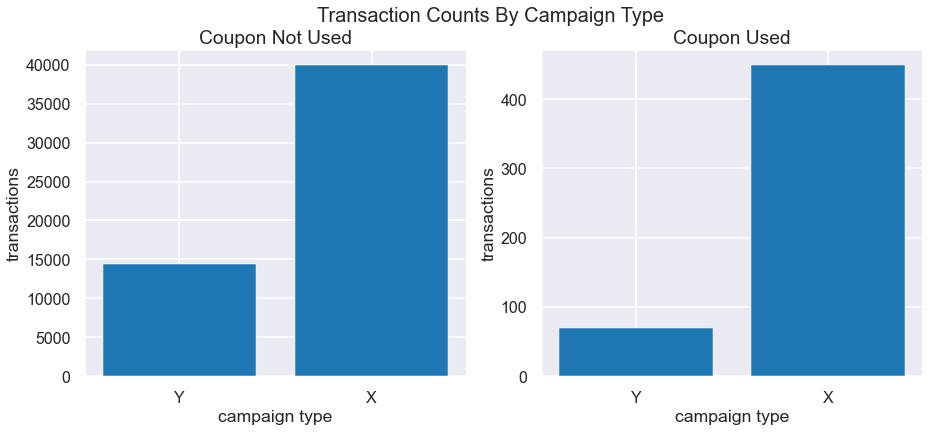

In [170]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

axes[0].bar(age_keys,cp_not_used_camp,align ='center')
axes[0].set_ylabel('transactions')
axes[0].set_xlabel('campaign type')
axes[0].set_title('coupon not used'.title())

axes[1].bar(age_keys,cp_used_camp,align ='center')
axes[1].set_ylabel('transactions')
axes[1].set_xlabel('campaign type')
axes[1].set_title('coupon used'.title())

plt.suptitle('Transaction counts by campaign type'.title(), fontsize = 20)
plt.show()

In [173]:
train_data.columns

Index(['id', 'redemption_status', 'campaign_id', 'coupon_id', 'customer_id',
       'avg_qnt_cust', 'avg_cp_used_cust', 'avg_sprice_cust', 'sum_price_cust',
       'rented', 'income_bracket', 'ct_brands', 'sum_cp_used', 'avg_sprice',
       'avg_odiscount', 'avg_cdiscount', 'ct_cat', 'duration', 'family_size_2',
       'no_of_children_0', 'no_of_children_2', 'no_of_children_3+',
       'brand_type_Established', 'mode_cat_Dairy, Juices & Snacks',
       'mode_cat_Flowers & Plants', 'mode_cat_Grocery', 'mode_cat_Meat',
       'mode_cat_Natural Products', 'mode_cat_Packaged Meat',
       'mode_cat_Pharmaceutical', 'mode_cat_Prepared Food', 'mode_cat_Seafood',
       'mode_cat_Skin & Hair Care', 'campaign_type_Y', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single'],
      dtype='object')

In [174]:
train_data

,id,redemption_status,campaign_id,coupon_id,customer_id,avg_qnt_cust,avg_cp_used_cust,avg_sprice_cust,sum_price_cust,rented,...,mode_cat_Skin & Hair Care,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
0,117578,0,8,725,45,109.359492,0.121824,123.421652,165138.17,0.0,...,0,0,0,0,0,1,0,0,1,0
1,123337,0,29,265,334,1.102222,0.062222,97.819733,22009.44,0.0,...,0,1,0,0,0,0,0,0,0,0
2,46642,0,13,281,408,10.222609,0.006957,99.623130,57283.30,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10510,0,13,625,577,169.897833,0.007224,112.194799,108716.76,0.0,...,0,0,0,0,0,1,0,0,1,0
4,14347,0,13,480,414,122.129928,0.013441,87.214265,97331.12,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54853,127422,0,9,18,690,181.237828,0.003745,116.455412,62187.19,0.0,...,0,1,0,0,0,0,0,0,0,0
54854,123176,0,13,561,705,351.260569,0.000863,179.083632,207557.93,0.0,...,0,0,0,0,0,0,0,0,0,0
54855,59852,0,13,277,103,564.879539,0.000000,154.920006,268786.21,0.0,...,0,0,0,0,0,1,0,0,0,0
54856,65978,0,8,916,184,355.502846,0.000000,132.168197,69652.64,0.0,...,0,0,0,0,0,0,0,0,0,0
